In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import seaborn as sns
from matplotlib import axes
import os 
import pandas as pd
import json

import sys, os
sys.path.append('/cluster/home/kamara/Explain')
from clutils.nbutils import *
from clutils.nbutils.params import get_param_ranges
os.getcwd()

/cluster/apps/nss/gcc-6.3.0/python/3.7.4/x86_64/lib64/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


'/cluster/home/kamara/Explain/exp_synthetic'

# Sparsity

In [53]:
dir = '/cluster/home/kamara/Explain/csv/'

expe = "sparsity"


jsonpath = f'/cluster/home/kamara/Explain/config_{expe}.json'
ranges = get_param_ranges(jsonpath)

df_sparsity = pd.read_csv(os.path.join(dir, f'{expe}.csv'), index_col = 0)
res = df_sparsity.groupby(by=['dataset', 'sparsity', 'explainer_name']).mean()
res = res.reset_index()

,dataset,sparsity,explainer_name,num_test_nodes,gpu,f1_score,recall,precision,auc,fidelity_acc+,fidelity_acc-,fidelity_prob+,fidelity_prob-,mask_sparsity,expl_edges,time,number_of_edges,mask_sparsity_init,non_zero_values_init
0,syn1,0.000,distance,100.0,1.0,0.005823,1.000,0.002920,0.998450,0.53,0.00,0.487905,0.000000,0.009175,4072.29,0.0159,4110.0,0.009175,4072.29
1,syn1,0.000,gnnexplainer,100.0,1.0,0.470810,1.000,0.371259,0.968212,0.53,0.00,0.487905,0.000000,0.937606,256.44,2.5984,4110.0,0.937606,256.44
2,syn1,0.000,ig_node,100.0,1.0,0.007333,0.920,0.003703,0.519937,0.53,0.24,0.484979,0.238978,0.050822,3901.12,0.1673,4110.0,0.050822,3901.12
3,syn1,0.000,occlusion,100.0,1.0,0.005822,1.000,0.002920,0.040737,0.53,0.00,0.323772,-0.100171,0.000243,4109.00,0.5983,4110.0,0.000243,4109.00
4,syn1,0.000,pagerank,100.0,1.0,0.005825,1.000,0.002921,0.999891,0.53,0.00,0.487905,0.000000,0.000487,4108.00,0.0210,4110.0,0.000487,4108.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,syn6,0.997,occlusion,100.0,1.0,0.021833,0.034,0.016091,0.507144,0.07,0.56,0.062125,0.517062,0.997214,11.00,0.5959,3948.0,0.000274,3946.92
164,syn6,0.997,pagerank,100.0,1.0,0.901818,0.992,0.826667,0.945806,0.64,0.01,0.589573,-0.011860,0.997214,11.00,0.0205,3948.0,0.000507,3946.00
165,syn6,0.997,pgmexplainer,100.0,1.0,0.463463,0.512,0.423651,0.743368,0.55,0.22,0.497010,0.216077,0.997214,11.00,3.7949,3948.0,0.781282,863.50
166,syn6,0.997,random,100.0,1.0,0.001250,0.002,0.000909,0.499104,0.00,0.64,0.000075,0.589573,0.997214,11.00,0.0001,3948.0,0.000253,3947.00


In [58]:
df_sparsity = pd.read_csv(os.path.join(dir, f'{expe}.csv'), index_col = 0)
df_sparsity = df_sparsity.reset_index()
df3 = df_sparsity[df_sparsity.dataset=="syn3"]
res = df3.groupby(by=['dataset', 'explainer_name', 'sparsity']).mean()
res

num_test_nodes  gpu  f1_score    recall  \
dataset explainer_name sparsity                                            
syn3    distance       0.000              100.0  1.0  0.009405  1.000000   
                       0.700              100.0  1.0  0.020287  1.000000   
                       0.990              100.0  1.0  0.460177  0.944167   
                       0.997              100.0  1.0  0.782415  0.730000   
        gnnexplainer   0.000              100.0  1.0  0.735411  0.930000   
                       0.700              100.0  1.0  0.735424  0.930000   
                       0.990              100.0  1.0  0.732548  0.831667   
                       0.997              100.0  1.0  0.664875  0.635000   
        ig_node        0.000              100.0  1.0  0.008507  0.904167   
                       0.700              100.0  1.0  0.000000  0.000000   
                       0.990              100.0  1.0  0.000000  0.000000   
                       0.997              100.0  1.0  0.000000  0.000000   
        occlusion      0.000              100.0  1.0  0.058998  1.000000   
                       0.700              100.0  1.0  0.065251  0.686667   
                       0.990              100.0  1.0  0.334111  0.568333   
                       0.997              100.0  1.0  0.359030  0.364167   
        pagerank       0.000              100.0  1.0  0.009410  1.000000   
                       0.700              100.0  1.0  0.031008  1.000000   
                       0.990              100.0  1.0  0.645064  0.995000   
                       0.997              100.0  1.0  0.781000  0.650833   
        pgmexplainer   0.000              100.0  1.0  0.517918  0.995833   
                       0.700              100.0  1.0  0.512015  0.971667   
                       0.990              100.0  1.0  0.580939  0.770833   
                       0.997              100.0  1.0  0.553017  0.461667   
        random         0.000              100.0  1.0  0.009404  1.000000   
                       0.700              100.0  1.0  0.009474  0.515833   
                       0.990              100.0  1.0  0.007763  0.020000   
                       0.997              100.0  1.0  0.004444  0.005000   
        sa_node        0.000              100.0  1.0  0.008132  0.864167   
                       0.700              100.0  1.0  0.000000  0.000000   
                       0.990              100.0  1.0  0.000000  0.000000   
                       0.997              100.0  1.0  0.000000  0.000000   

                                 precision       auc  fidelity_acc+  \
dataset explainer_name sparsity                                       
syn3    distance       0.000      0.004725  0.988557            0.0   
                       0.700      0.010248  0.988484            0.0   
                       0.990      0.304956  0.933118            0.0   
                       0.997      0.848084  0.772340            0.0   
        gnnexplainer   0.000      0.690652  0.952641            0.0   
                       0.700      0.690659  0.953298            0.0   
                       0.990      0.690107  0.903253            0.0   
                       0.997      0.703520  0.719762            0.0   
        ig_node        0.000      0.004274  0.000415            0.0   
                       0.700      0.000000  0.349288            0.0   
                       0.990      0.000000  0.495055            0.0   
                       0.997      0.000000  0.498517            0.0   
        occlusion      0.000      0.048454  0.626302            0.0   
                       0.700      0.051652  0.737183            0.0   
                       0.990      0.241823  0.738895            0.0   
                       0.997      0.355556  0.604036            0.0   
        pagerank       0.000      0.004727  0.999801            0.0   
                       0.700      0.015748  0.999801            0.0   
                       0.990

In [12]:
def explainer_type(row):
    if row['explainer_name'] in ['gnnexplainer', 'pgmexplainer', 'occlusion', 'subgraphx'] :
      return('pertubation')
    elif row['explainer_name'] in ['sa_node', 'ig_node'] :
      return('gradient')
    return('baseline')



df_sparsity['type'] = df_sparsity.apply(lambda row: explainer_type(row), axis=1)
df_sparsity["1-fidelity_acc-"] = 1- df_sparsity["fidelity_acc-"]
df_sparsity["1-fidelity_prob-"] = 1- df_sparsity["fidelity_prob-"]

In [13]:
df_sparsity = df_sparsity.reset_index()
df_sparsity

,dataset,sparsity,explainer_name,num_test_nodes,gpu,f1_score,recall,precision,auc,fidelity_acc+,...,fidelity_prob-,mask_sparsity,expl_edges,time,number_of_edges,mask_sparsity_init,non_zero_values_init,type,1-fidelity_acc-,1-fidelity_prob-
0,syn1,0.000,distance,100.0,1.0,0.005823,1.000,0.002920,0.998450,0.53,...,0.000000,0.009175,4072.29,0.0159,4110.0,0.009175,4072.29,baseline,1.00,1.000000
1,syn1,0.000,gnnexplainer,100.0,1.0,0.470810,1.000,0.371259,0.968212,0.53,...,0.000000,0.937606,256.44,2.5984,4110.0,0.937606,256.44,pertubation,1.00,1.000000
2,syn1,0.000,ig_node,100.0,1.0,0.007333,0.920,0.003703,0.519937,0.53,...,0.238978,0.050822,3901.12,0.1673,4110.0,0.050822,3901.12,gradient,0.76,0.761022
3,syn1,0.000,occlusion,100.0,1.0,0.005822,1.000,0.002920,0.040737,0.53,...,-0.100171,0.000243,4109.00,0.5983,4110.0,0.000243,4109.00,pertubation,1.00,1.100171
4,syn1,0.000,pagerank,100.0,1.0,0.005825,1.000,0.002921,0.999891,0.53,...,0.000000,0.000487,4108.00,0.0210,4110.0,0.000487,4108.00,baseline,1.00,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,syn6,0.997,occlusion,100.0,1.0,0.021833,0.034,0.016091,0.507144,0.07,...,0.517062,0.997214,11.00,0.5959,3948.0,0.000274,3946.92,pertubation,0.44,0.482938
164,syn6,0.997,pagerank,100.0,1.0,0.901818,0.992,0.826667,0.945806,0.64,...,-0.011860,0.997214,11.00,0.0205,3948.0,0.000507,3946.00,baseline,0.99,1.011860
165,syn6,0.997,pgmexplainer,100.0,1.0,0.463463,0.512,0.423651,0.743368,0.55,...,0.216077,0.997214,11.00,3.7949,3948.0,0.781282,863.50,pertubation,0.78,0.783923
166,syn6,0.997,random,100.0,1.0,0.001250,0.002,0.000909,0.499104,0.00,...,0.589573,0.997214,11.00,0.0001,3948.0,0.000253,3947.00,baseline,0.36,0.410427


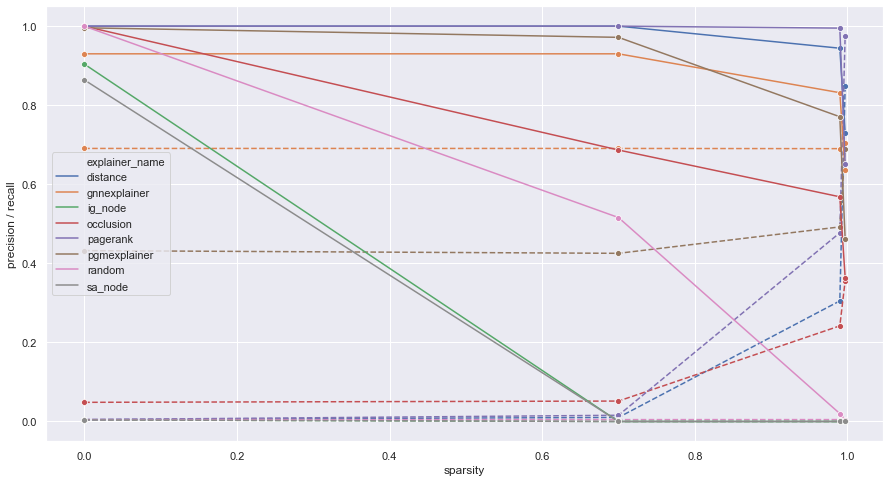

In [23]:
# Create a visualization


fig, ax = plt.subplots(figsize=(15,8))
g0 = sns.lineplot(
    data=df_sparsity[df_sparsity.dataset=="syn3"],
    x="sparsity", y="precision",
    hue="explainer_name", marker="o", linestyle='--', ax=ax, legend=False)
for line in g0.lines:
    line.set_linestyle("--")

g1 = sns.lineplot(
    data=df_sparsity[df_sparsity.dataset=="syn3"],
    x="sparsity", y="recall",
    hue="explainer_name", marker="o", ax=ax)


plt.ylabel('precision / recall')
plt.show()


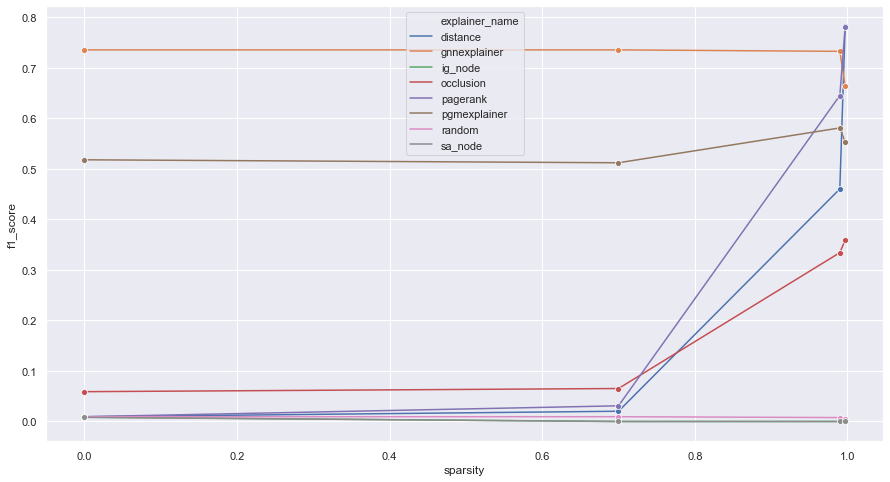

In [24]:
fig, ax = plt.subplots(figsize=(15,8))
sns.lineplot(
    data=df_sparsity[df_sparsity.dataset=="syn3"],
    x="sparsity", y="f1_score", 
    hue="explainer_name", marker="o", ax=ax)


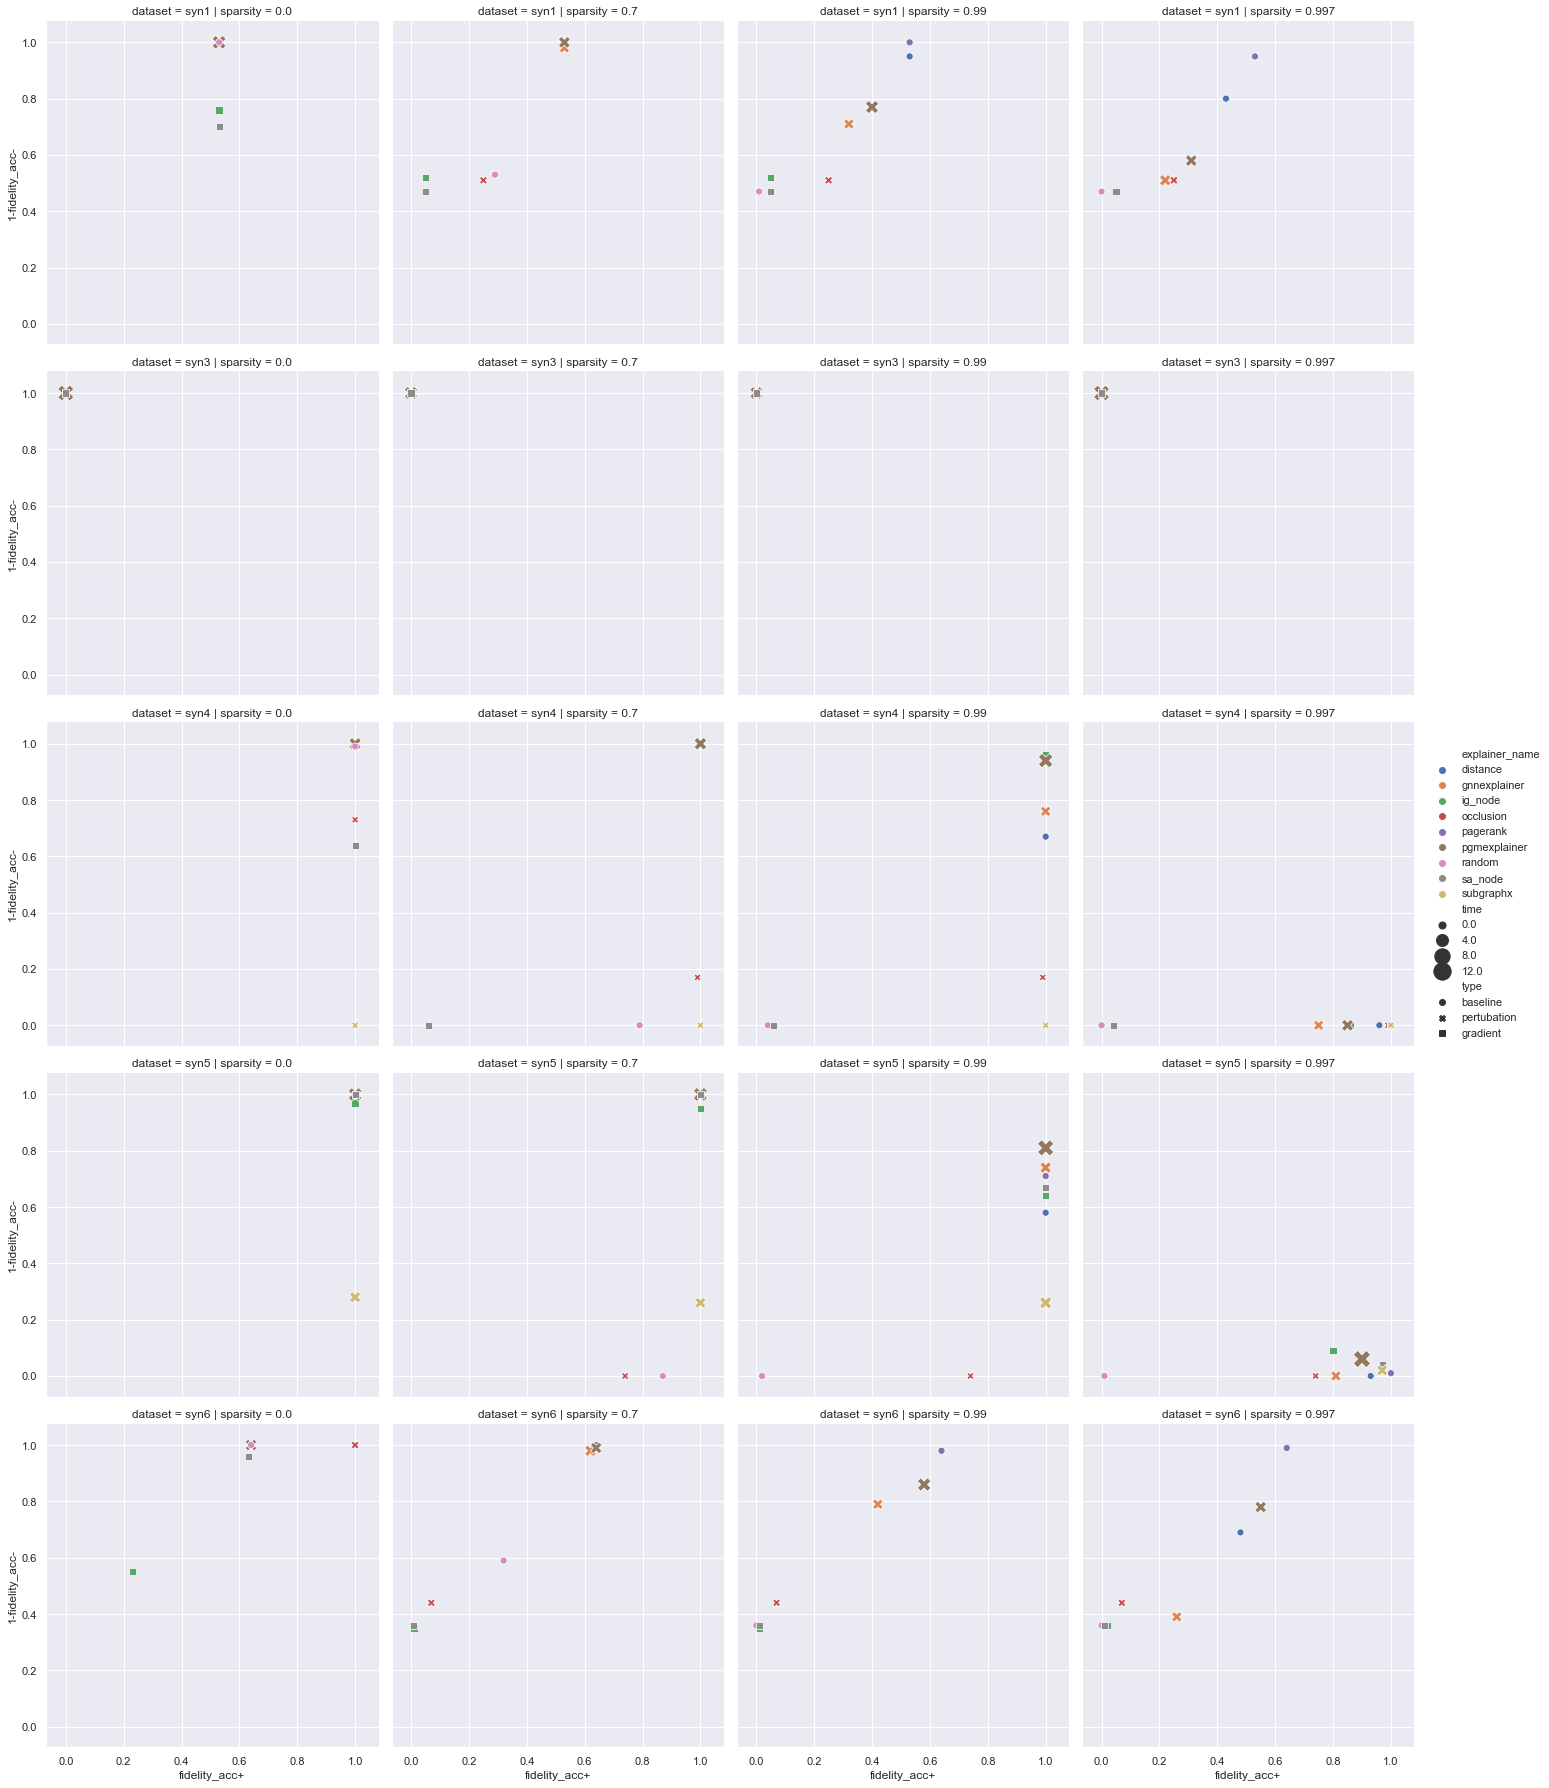

In [19]:
sns.set()

sns.relplot(
        data=df_sparsity,
        x="fidelity_acc+", y="1-fidelity_acc-", col="sparsity", row="dataset", 
        hue="explainer_name", size="time", sizes=(50, 300), style="type"
    )


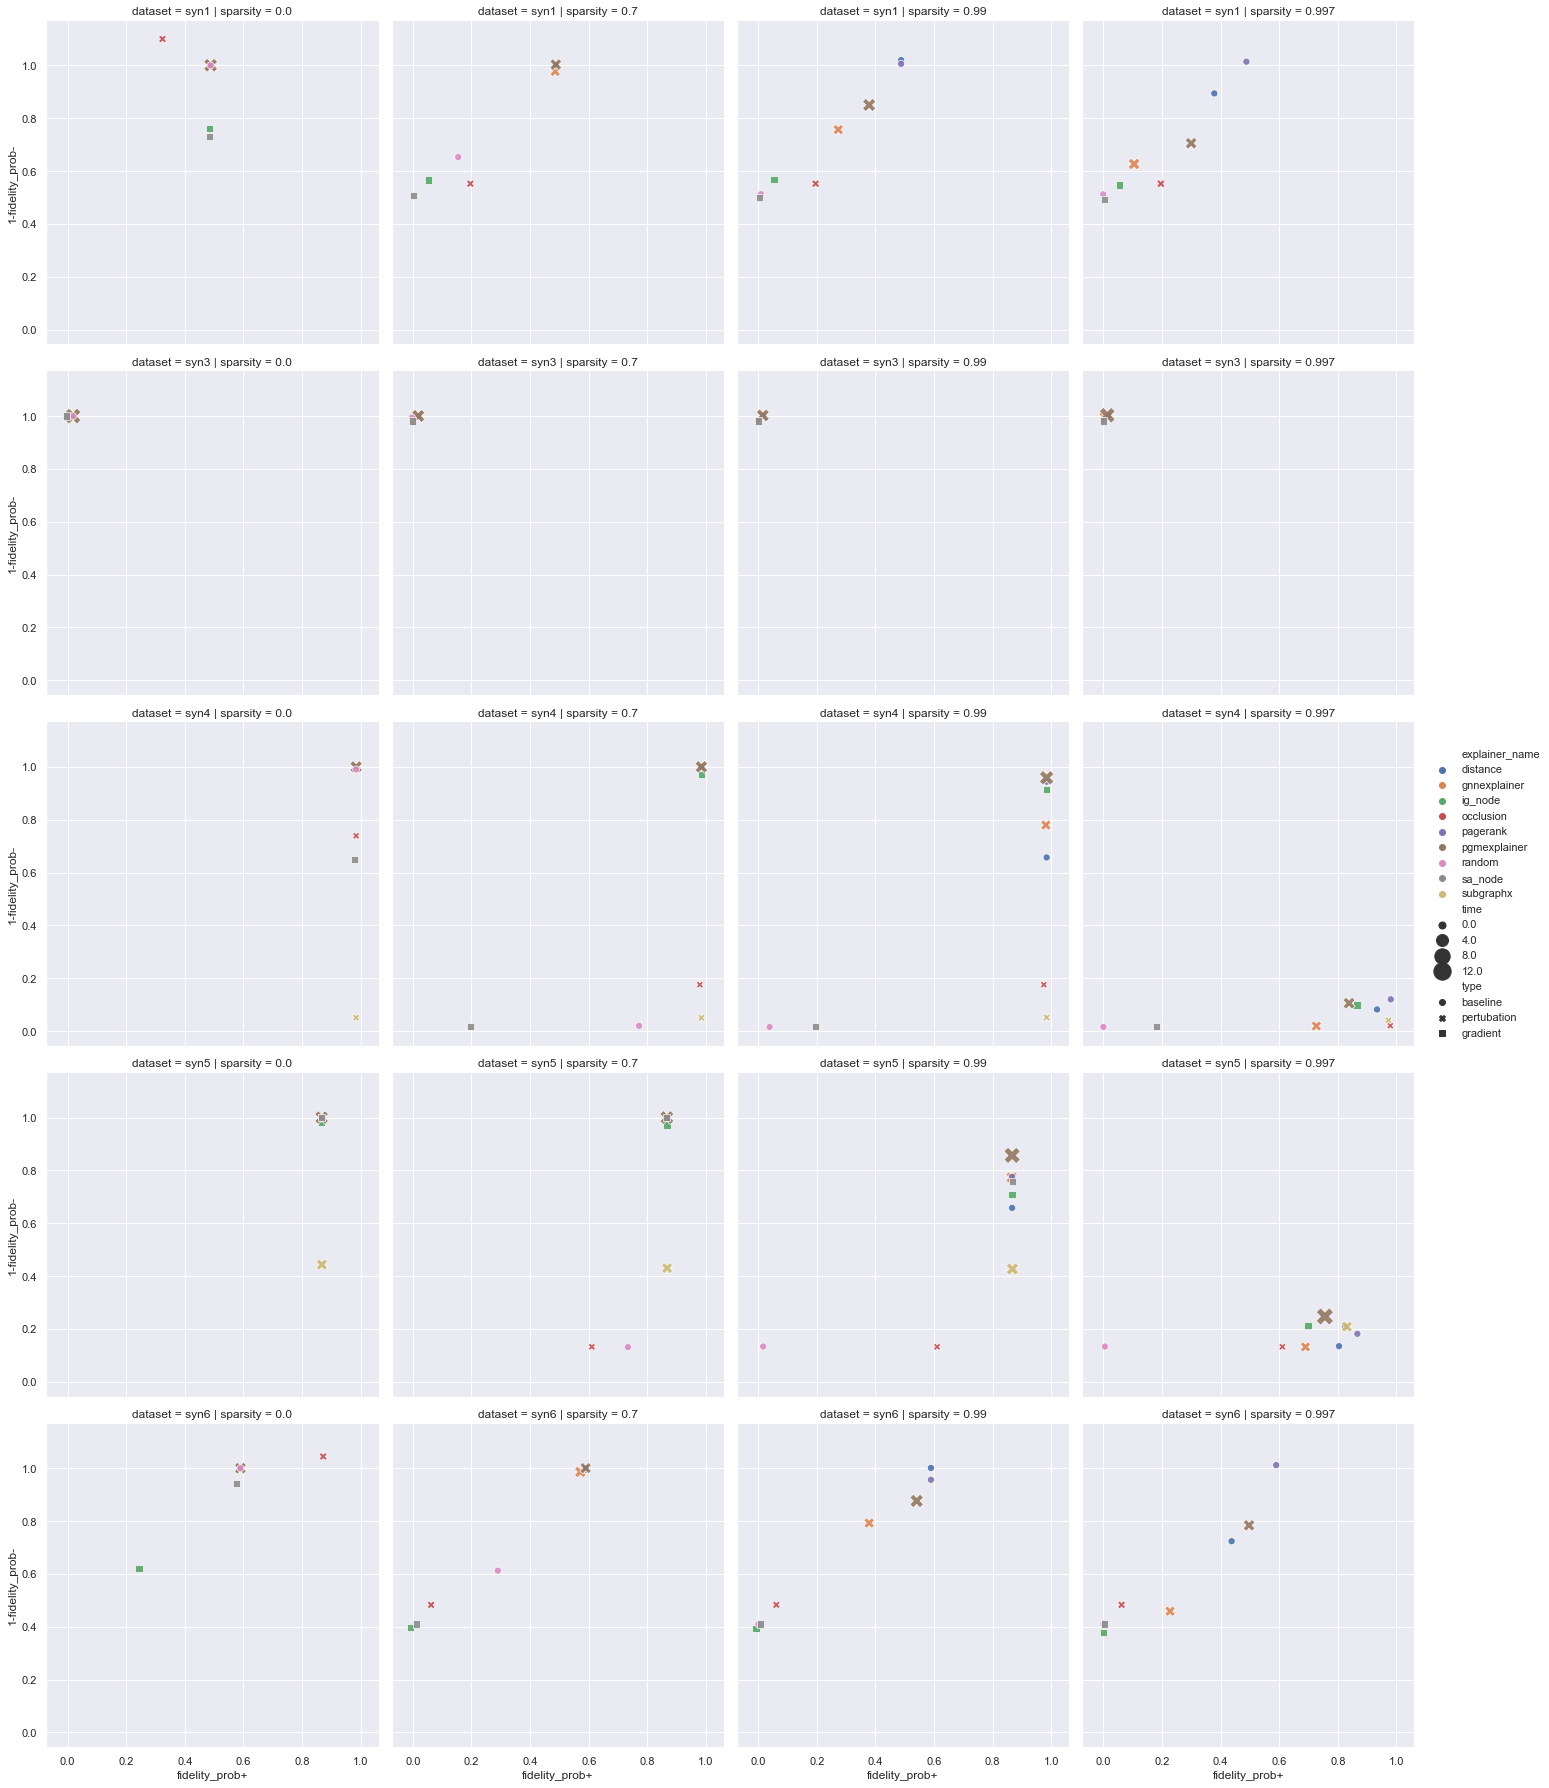

In [20]:
sns.relplot(
        data=df_sparsity,
        x="fidelity_prob+", y="1-fidelity_prob-", col="sparsity", row="dataset", 
        hue="explainer_name", size="time", sizes=(50, 300), style="type", alpha = .9
    )

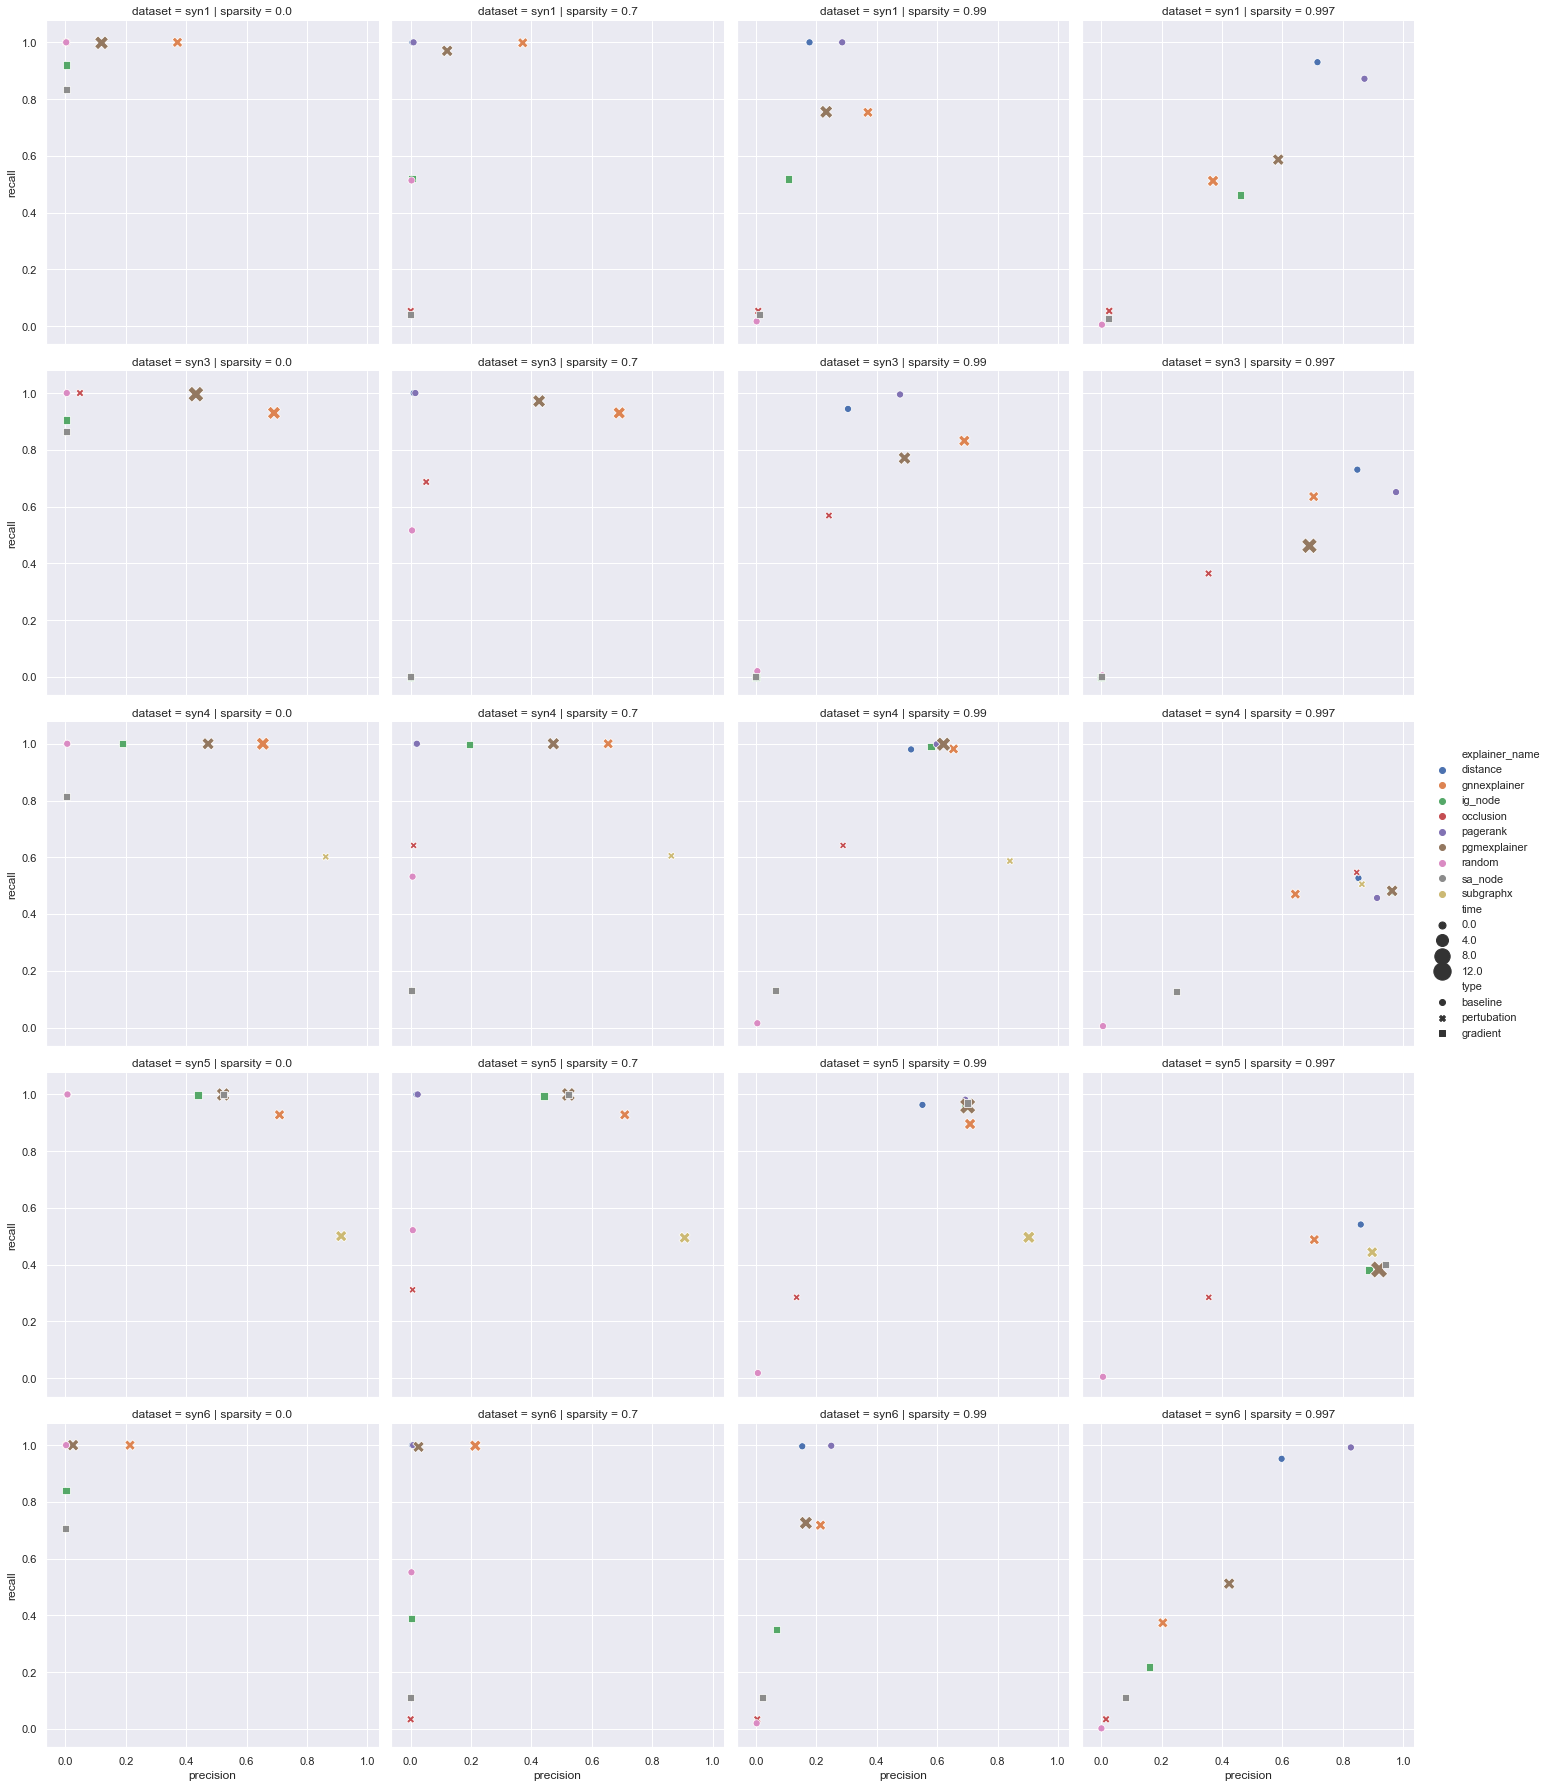

In [21]:
sns.relplot(
        data=df_sparsity,
        x="precision", y="recall", col="sparsity", row="dataset", 
        hue="explainer_name", size="time", sizes=(50, 300), style="type"
    )

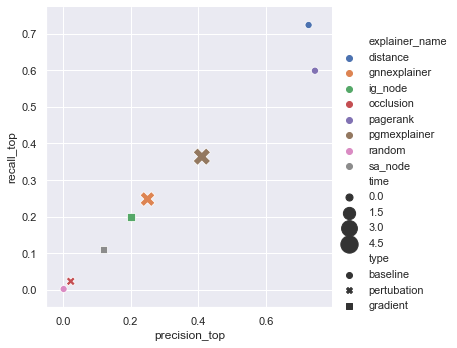

In [30]:
# Create a visualization
ax = sns.relplot(
    data=df_syn1[df_syn1.sparsity==0.99],
    x="precision_top", y="recall_top",
    hue="explainer_name", size="time", sizes=(50, 300), style="type"
)


# Threshold

In [42]:
dir = '/cluster/home/kamara/Explain/csv/'

expe = "threshold"


jsonpath = f'/cluster/home/kamara/Explain/config_{expe}.json'
ranges = get_param_ranges(jsonpath)

df = pd.read_csv(os.path.join(dir, f'{expe}.csv'), index_col = 0)
#res = df.groupby(by=['dataset', 'threshold', 'explainer_name']).mean()
#res.reset_index()
#df = df.reset_index()
#df = df[df.dataset=="syn1"]
res = df.groupby(by=['dataset', 'explainer_name', 'threshold']).mean()
res.reset_index()

,dataset,explainer_name,threshold,num_test_nodes,gpu,f1_score,recall,precision,auc,fidelity_acc+,fidelity_acc-,fidelity_prob+,fidelity_prob-,mask_sparsity,expl_edges,time,number_of_edges,mask_sparsity_init,non_zero_values_init
0,syn1,distance,0.5,100.0,1.0,0.563576,0.413333,0.939500,0.603303,0.05,0.53,-0.123116,0.487905,0.999336,2.73,0.0162,4110.0,0.009175,4072.29
1,syn1,distance,0.8,100.0,1.0,0.563576,0.413333,0.939500,0.603303,0.05,0.53,-0.123116,0.487905,0.999336,2.73,0.0139,4110.0,0.009175,4072.29
2,syn1,distance,0.9,100.0,1.0,0.563576,0.413333,0.939500,0.603303,0.05,0.53,-0.123116,0.487905,0.999336,2.73,0.0163,4110.0,0.009175,4072.29
3,syn1,gnnexplainer,0.5,100.0,1.0,0.365325,0.650000,0.355707,0.720080,0.44,0.29,0.285291,0.151176,0.941944,238.61,2.6174,4110.0,0.937606,256.44
4,syn1,gnnexplainer,0.8,100.0,1.0,0.396900,0.683333,0.392814,0.727922,0.44,0.31,0.300469,0.173215,0.942144,237.79,4.7447,4110.0,0.937606,256.44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,syn6,sa_node,0.8,100.0,1.0,0.114324,0.112000,0.246149,0.331125,0.01,0.64,-0.010230,0.589573,0.548607,1782.10,0.0029,3948.0,0.000750,3945.04
131,syn6,sa_node,0.9,100.0,1.0,0.180224,0.112000,0.532635,0.336103,0.01,0.64,-0.014498,0.589573,0.560998,1733.18,0.0027,3948.0,0.000750,3945.04
132,syn6,subgraphx,0.5,100.0,1.0,0.770111,0.740000,0.814000,0.869815,0.62,0.04,0.570269,0.045479,0.997756,8.86,3.0914,3948.0,0.977756,8.86
133,syn6,subgraphx,0.8,100.0,1.0,0.782778,0.752000,0.827500,0.875820,0.63,0.03,0.580068,0.035429,0.997735,8.94,3.3878,3948.0,0.987736,8.94


In [43]:
def explainer_type(row):
    if row['explainer_name'] in ['gnnexplainer', 'pgmexplainer', 'occlusion', 'subgraphx'] :
      return('pertubation')
    elif row['explainer_name'] in ['sa_node', 'ig_node'] :
      return('gradient')
    return('baseline')



df['type'] = df.apply(lambda row: explainer_type(row), axis=1)
df["1-fidelity_acc-"] = 1- df["fidelity_acc-"]
df["1-fidelity_prob-"] = 1- df["fidelity_prob-"]

In [44]:
df = df.reset_index()
df

,dataset,threshold,explainer_name,num_test_nodes,gpu,f1_score,recall,precision,auc,fidelity_acc+,...,fidelity_prob-,mask_sparsity,expl_edges,time,number_of_edges,mask_sparsity_init,non_zero_values_init,type,1-fidelity_acc-,1-fidelity_prob-
0,syn1,0.5,distance,100.0,1.0,0.563576,0.413333,0.939500,0.603303,0.05,...,0.487905,0.999336,2.73,0.0162,4110.0,0.009175,4072.29,baseline,0.47,0.512095
1,syn1,0.5,gnnexplainer,100.0,1.0,0.365325,0.650000,0.355707,0.720080,0.44,...,0.151176,0.941944,238.61,2.6174,4110.0,0.937606,256.44,pertubation,0.71,0.848824
2,syn1,0.5,ig_node,100.0,1.0,0.446275,0.436667,0.459524,0.478424,0.05,...,0.445705,0.520219,1971.90,0.1674,4110.0,0.050822,3901.12,gradient,0.47,0.554295
3,syn1,0.5,occlusion,100.0,1.0,0.001630,0.240000,0.000818,0.062967,0.48,...,0.009594,0.062044,3855.00,0.7179,4110.0,0.000243,4109.00,pertubation,0.95,0.990406
4,syn1,0.5,pagerank,100.0,1.0,0.880128,0.861667,0.903381,0.930774,0.53,...,-0.018173,0.997202,11.50,0.0198,4110.0,0.000487,4108.00,baseline,0.95,1.018173
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,syn6,0.9,pagerank,100.0,1.0,0.423048,0.314000,0.957333,0.656954,0.63,...,0.326768,0.999103,3.54,0.0209,3948.0,0.000507,3946.00,baseline,0.64,0.673232
131,syn6,0.9,pgmexplainer,100.0,1.0,0.380048,0.376000,0.560708,0.687330,0.57,...,0.253975,0.997219,10.98,3.8762,3948.0,0.780314,867.32,pertubation,0.77,0.746025
132,syn6,0.9,random,100.0,1.0,0.005078,0.194000,0.002573,0.500879,0.07,...,0.577516,0.899491,396.81,0.0000,3948.0,0.000253,3947.00,baseline,0.37,0.422484
133,syn6,0.9,sa_node,100.0,1.0,0.180224,0.112000,0.532635,0.336103,0.01,...,0.589573,0.560998,1733.18,0.0027,3948.0,0.000750,3945.04,gradient,0.36,0.410427


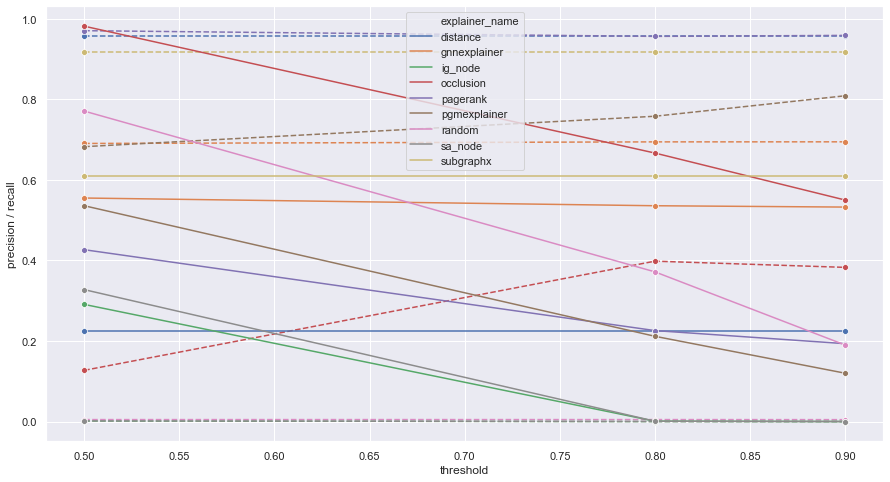

In [45]:
# Create a visualization


fig, ax = plt.subplots(figsize=(15,8))
g0 = sns.lineplot(
    data=df[df.dataset=="syn3"],
    x="threshold", y="precision",
    hue="explainer_name", marker="o", linestyle='--', ax=ax, legend=False)
for line in g0.lines:
    line.set_linestyle("--")

g1 = sns.lineplot(
    data=df[df.dataset=="syn3"],
    x="threshold", y="recall",
    hue="explainer_name", marker="o", ax=ax)


plt.ylabel('precision / recall')
plt.show()


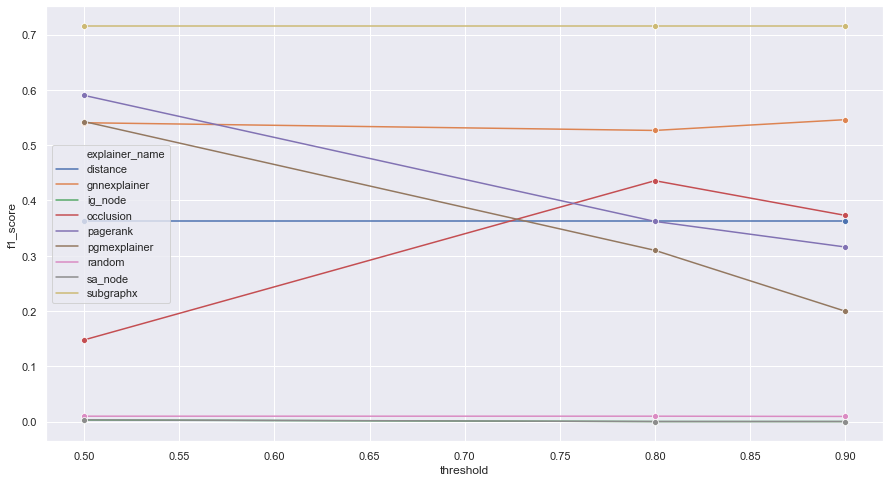

In [46]:
fig, ax = plt.subplots(figsize=(15,8))
sns.lineplot(
    data=df[df.dataset=="syn3"],
    x="threshold", y="f1_score", 
    hue="explainer_name", marker="o", ax=ax)


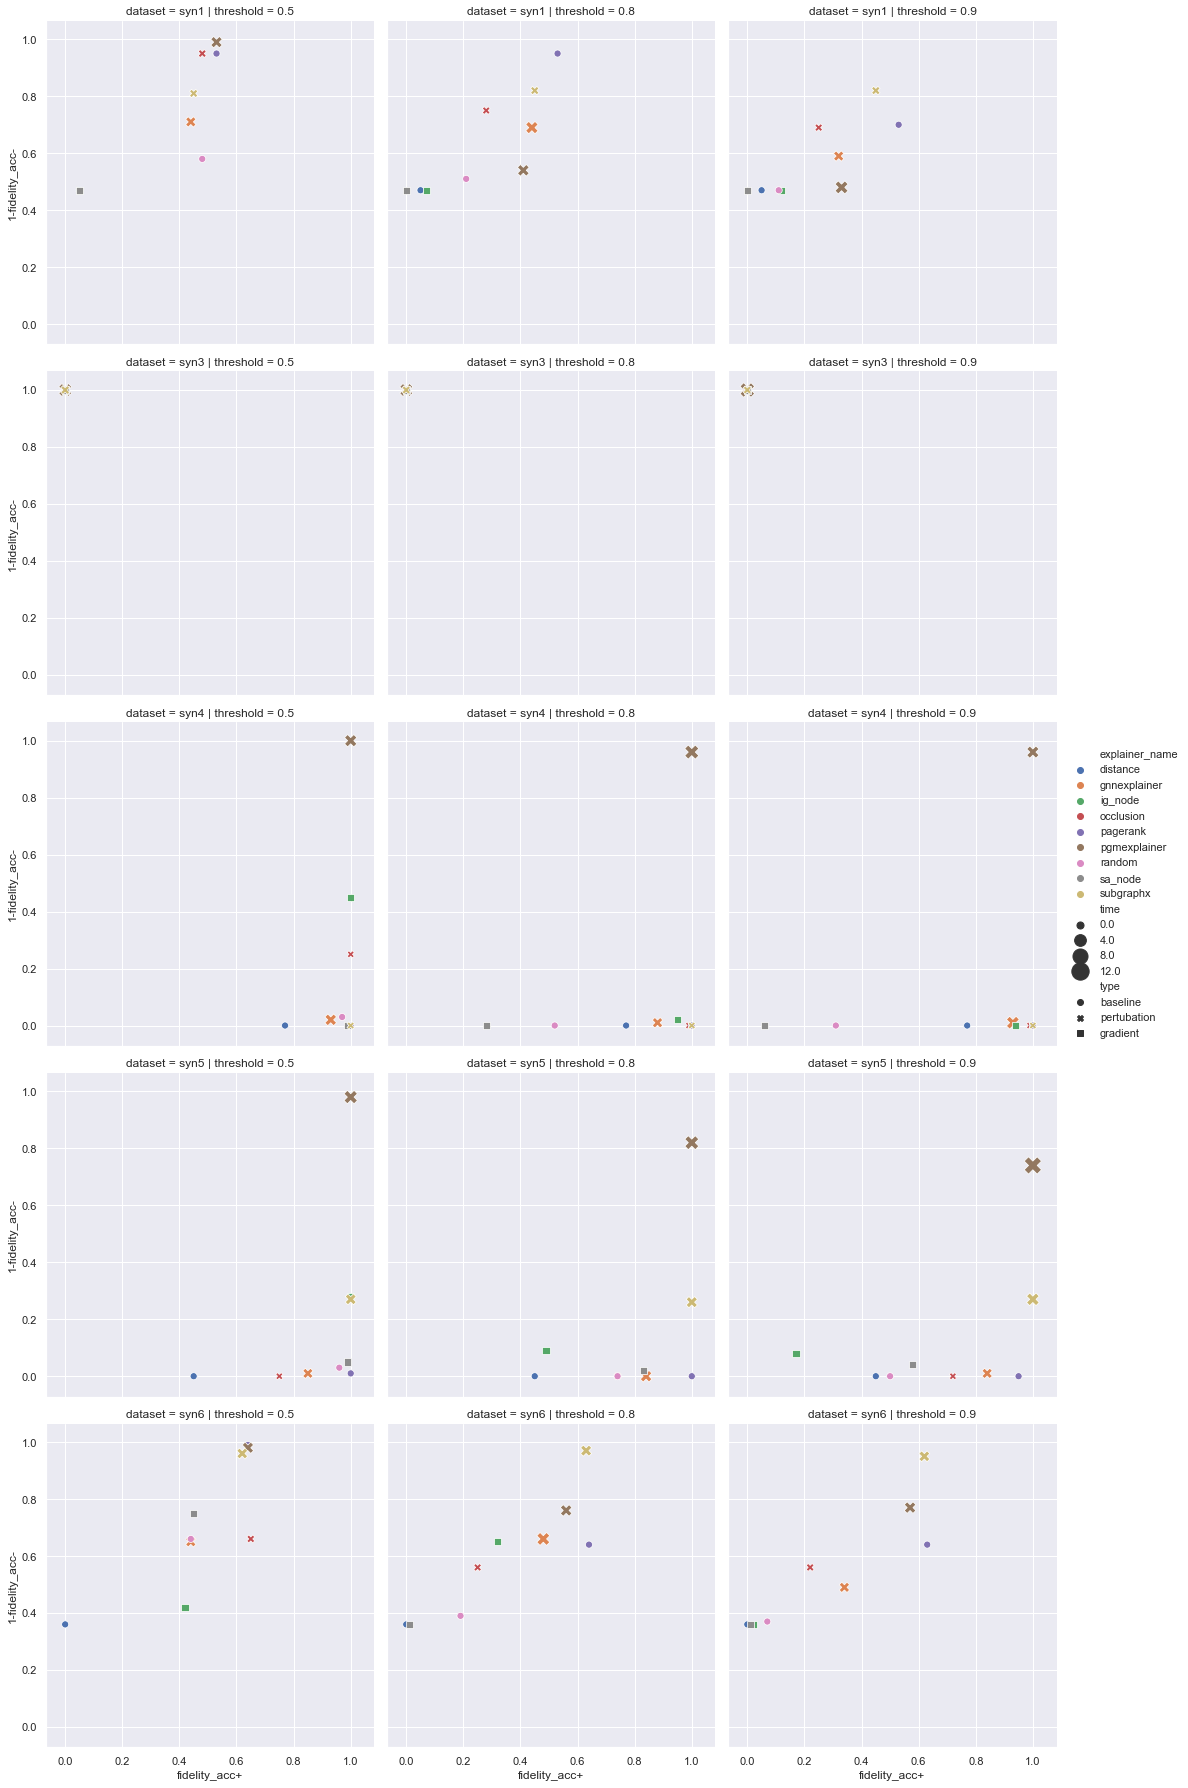

In [47]:
sns.set()

sns.relplot(
        data=df,
        x="fidelity_acc+", y="1-fidelity_acc-", col="threshold", row="dataset", 
        hue="explainer_name", size="time", sizes=(50, 300), style="type"
    )


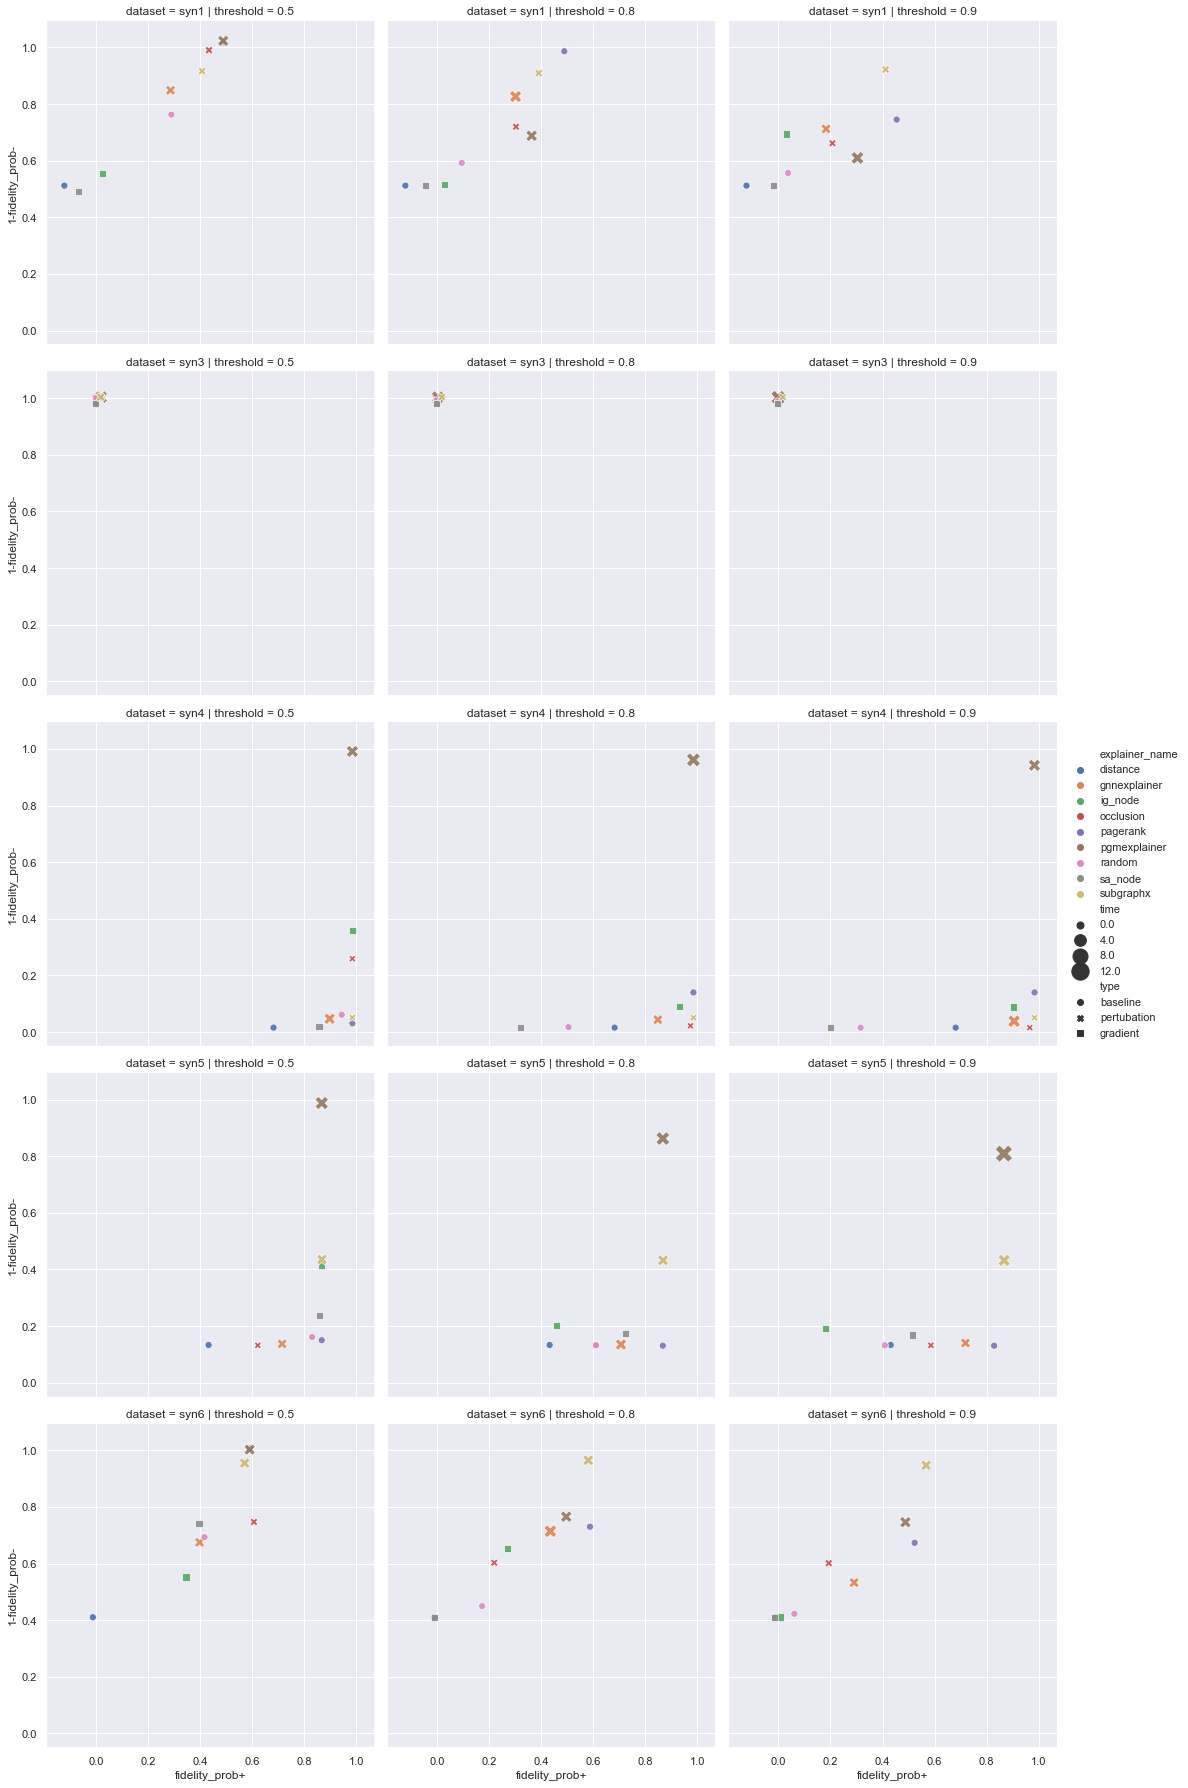

In [49]:
sns.relplot(
        data=df,
        x="fidelity_prob+", y="1-fidelity_prob-", col="threshold", row="dataset", 
        hue="explainer_name", size="time", sizes=(50, 300), style="type", alpha = .9
    )

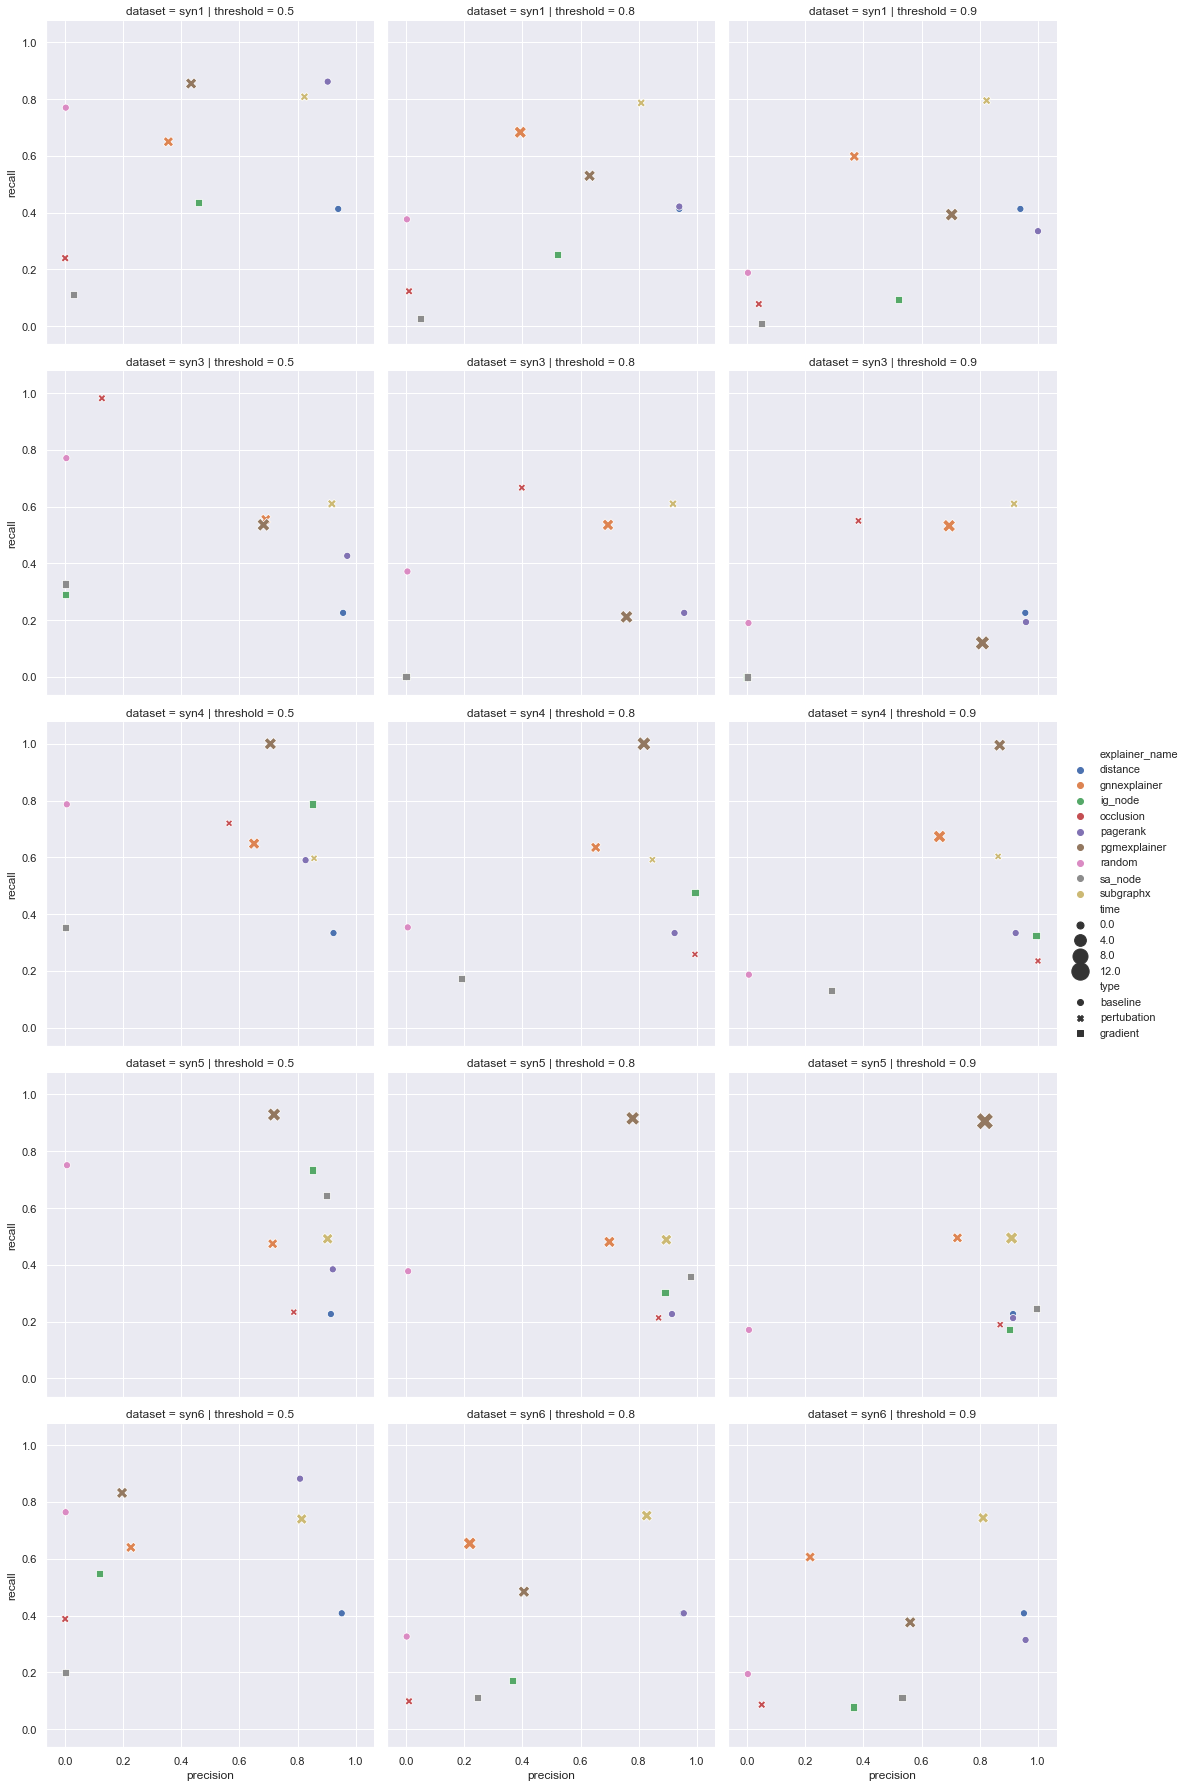

In [48]:
sns.relplot(
        data=df,
        x="precision", y="recall", col="threshold", row="dataset", 
        hue="explainer_name", size="time", sizes=(50, 300), style="type"
    )

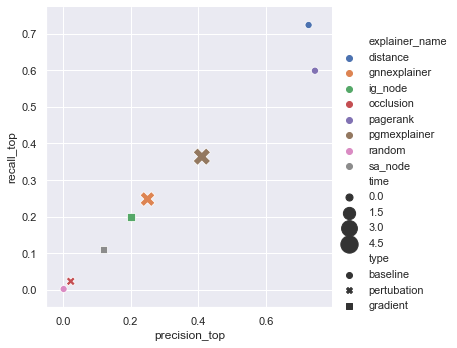

In [30]:
# Create a visualization
ax = sns.relplot(
    data=df_syn1[df_syn1.sparsity==0.99],
    x="precision_top", y="recall_top",
    hue="explainer_name", size="time", sizes=(50, 300), style="type"
)
